# Markov chains - heterogeneity

**Author: Wei Kang <weikang9009@gmail.com>**

## Regional exchange mobility pattern in US 1929-2009

Firstly we load in the US dataset:

In [13]:
import pandas as pd
import libpysal
import geopandas as gpd
import numpy as np
import giddy

geo_table = gpd.read_file(libpysal.examples.get_path('us48.shp'))
income_table = pd.read_csv(libpysal.examples.get_path("usjoin.csv"))
complete_table = geo_table.merge(income_table,left_on='STATE_NAME',right_on='Name')
complete_table.head()

,AREA,PERIMETER,STATE_,STATE_ID,STATE_NAME,STATE_FIPS_x,SUB_REGION,STATE_ABBR,geometry,Name,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,20.750,34.956,1,1,Washington,53,Pacific,WA,(POLYGON ((-122.400749206543 48.22539520263672...,Washington,...,31528,32053,32206,32934,34984,35738,38477,40782,41588,40619
1,45.132,34.527,2,2,Montana,30,Mtn,MT,POLYGON ((-111.4746322631836 44.70223999023438...,Montana,...,22569,24342,24699,25963,27517,28987,30942,32625,33293,32699
2,9.571,18.899,3,3,Maine,23,N Eng,ME,(POLYGON ((-69.77778625488281 44.0740737915039...,Maine,...,25623,27068,27731,28727,30201,30721,32340,33620,34906,35268
3,21.874,21.353,4,4,North Dakota,38,W N Cen,ND,POLYGON ((-98.73005676269531 45.93829727172852...,North Dakota,...,25068,26118,26770,29109,29676,31644,32856,35882,39009,38672
4,22.598,22.746,5,5,South Dakota,46,W N Cen,SD,POLYGON ((-102.7879333496094 42.99532318115234...,South Dakota,...,26115,27531,27727,30072,31765,32726,33320,35998,38188,36499


We will visualize the spatial distributions of per capita incomes of US states across 1929 to 2009 to obtain a first impression of the dynamics. 

/Users/weikang/anaconda3/lib/python3.6/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://pysal.org/about
  ), VisibleDeprecationWarning)
/Users/weikang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


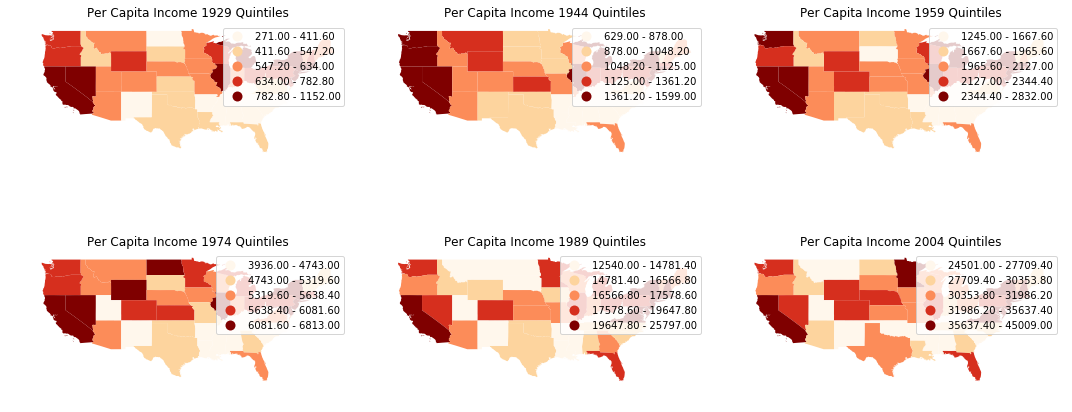

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

index_year = range(1929,2010,15)
fig, axes = plt.subplots(nrows=2, ncols=3,figsize = (15,7))
for i in range(2):
    for j in range(3):
        ax = axes[i,j]
        complete_table.plot(ax=ax, column=str(index_year[i*3+j]), cmap='OrRd', scheme='quantiles', legend=True)
        ax.set_title('Per Capita Income %s Quintiles'%str(index_year[i*3+j]))
        ax.axis('off')
plt.tight_layout()

Text(0.5,1,'Relative per capita incomes of 48 US states')

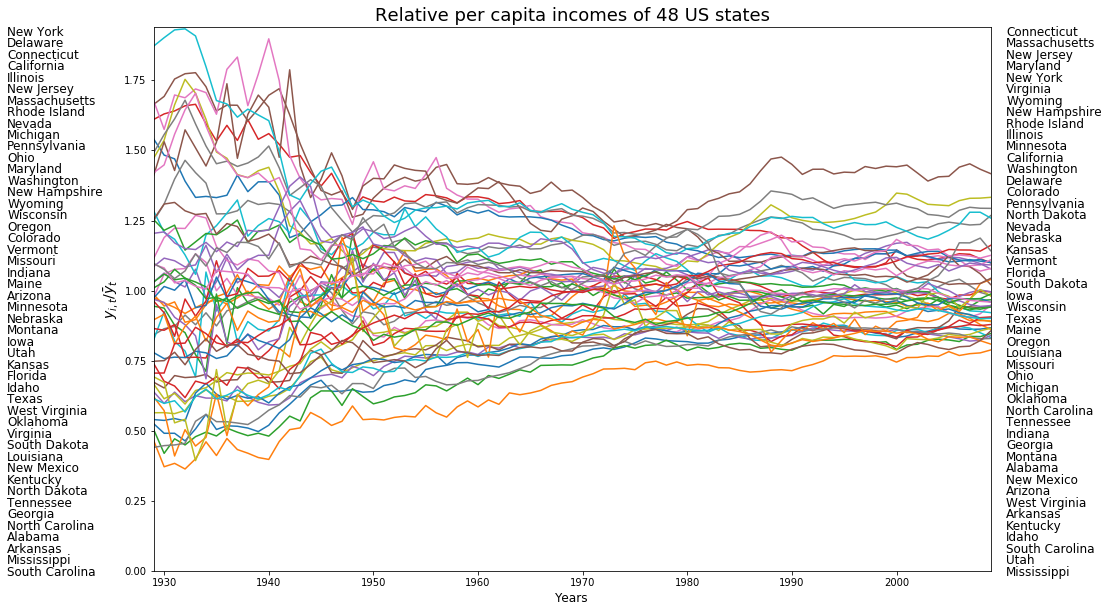

In [3]:
years = range(1929,2010)
names = income_table['Name']
pci = income_table.drop(['Name','STATE_FIPS'], 1).values.T
rpci= (pci.T / pci.mean(axis=1)).T
order1929 = np.argsort(rpci[0,:])
order2009 = np.argsort(rpci[-1,:])
names1929 = names[order1929[::-1]]
names2009 = names[order2009[::-1]]
first_last = np.vstack((names1929,names2009))
from pylab import rcParams
rcParams['figure.figsize'] = 15,10
p = plt.plot(years,rpci)
for i in range(48):
    plt.text(1915,1.91-(i*0.041), first_last[0][i],fontsize=12)
    plt.text(2010.5,1.91-(i*0.041), first_last[1][i],fontsize=12)
plt.xlim((years[0], years[-1]))
plt.ylim((0, 1.94))
plt.ylabel(r"$y_{i,t}/\bar{y}_t$",fontsize=14)
plt.xlabel('Years',fontsize=12)
plt.title('Relative per capita incomes of 48 US states',fontsize=18)

In [4]:
rpci.shape

(81, 48)

In [5]:
import copy
relative_complete_table = copy.deepcopy(complete_table)
index_year = list(map(str,range(1929,2010)))
relative_complete_table[index_year] = rpci.T
relative_complete_table.head()

,AREA,PERIMETER,STATE_,STATE_ID,STATE_NAME,STATE_FIPS_x,SUB_REGION,STATE_ABBR,geometry,Name,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,20.750,34.956,1,1,Washington,53,Pacific,WA,(POLYGON ((-122.400749206543 48.22539520263672...,Washington,...,0.832717,0.837863,0.850126,0.855097,0.864166,0.871194,0.863026,0.861483,0.862523,0.867464
1,45.132,34.527,2,2,Montana,30,Mtn,MT,POLYGON ((-111.4746322631836 44.70223999023438...,Montana,...,0.907470,0.898305,0.894320,0.889248,0.898152,0.918321,0.917061,0.901395,0.878975,0.862169
2,9.571,18.899,3,3,Maine,23,N Eng,ME,(POLYGON ((-69.77778625488281 44.0740737915039...,Maine,...,0.789646,0.805844,0.808500,0.822586,0.826682,0.823737,0.818148,0.836760,0.835742,0.846472
3,21.874,21.353,4,4,North Dakota,38,W N Cen,ND,POLYGON ((-98.73005676269531 45.93829727172852...,North Dakota,...,1.145069,1.121511,1.111607,1.108886,1.113998,1.121680,1.131648,1.129585,1.113718,1.099368
4,22.598,22.746,5,5,South Dakota,46,W N Cen,SD,POLYGON ((-102.7879333496094 42.99532318115234...,South Dakota,...,1.168982,1.172125,1.147523,1.118433,1.110250,1.119435,1.117365,1.108632,1.096425,1.077623


In [6]:
import mapclassify as mc
quintile_complete_table = copy.deepcopy(complete_table)
index_year = list(map(str,range(1929,2010)))
quintile_all  = mc.Quantiles(rpci.flatten(),k=5).yb.reshape(rpci.shape).T
quintile_complete_table[index_year] = quintile_all
quintile_complete_table.head()

/Users/weikang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,AREA,PERIMETER,STATE_,STATE_ID,STATE_NAME,STATE_FIPS_x,SUB_REGION,STATE_ABBR,geometry,Name,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,20.750,34.956,1,1,Washington,53,Pacific,WA,(POLYGON ((-122.400749206543 48.22539520263672...,Washington,...,0,0,1,1,1,1,1,1,1,1
1,45.132,34.527,2,2,Montana,30,Mtn,MT,POLYGON ((-111.4746322631836 44.70223999023438...,Montana,...,1,1,1,1,1,1,1,1,1,1
2,9.571,18.899,3,3,Maine,23,N Eng,ME,(POLYGON ((-69.77778625488281 44.0740737915039...,Maine,...,0,0,0,0,0,0,0,0,0,1
3,21.874,21.353,4,4,North Dakota,38,W N Cen,ND,POLYGON ((-98.73005676269531 45.93829727172852...,North Dakota,...,3,3,3,3,3,3,3,3,3,3
4,22.598,22.746,5,5,South Dakota,46,W N Cen,SD,POLYGON ((-102.7879333496094 42.99532318115234...,South Dakota,...,4,4,3,3,3,3,3,3,3,3


The above figure displays the trajectories of relative per capita incomes of 48 US states. It is quite obvious that states were swapping positions across 1929-2009. We will demonstrate how to quantify the exchange mobility as well as how to assess the regional and local contribution to the overall exchange mobility. We will ultilize [BEA regions](https://www.bea.gov/regional/docs/regions.cfm) and base on it for constructing the block weight matrix. 

BEA regional scheme divide US states into 8 regions:
* New England Region
* Mideast Region
* Great Lakes Region
* Plains Region
* Southeast Region
* Southwest Region
* Rocky Mountain Region
* Far West Region

As the dataset does not contain information regarding BEA regions, we manually input the regional information:

In [7]:
BEA_regions = ["New England Region","Mideast Region","Great Lakes Region","Plains Region","Southeast Region","Southwest Region","Rocky Mountain Region","Far West Region"]
BEA_regions_abbr = ["NENG","MEST","GLAK","PLNS","SEST","SWST","RKMT","FWST"]
BEA = pd.DataFrame({ 'Region code' : np.arange(1,9,1), 'BEA region' : BEA_regions,'BEA abbr':BEA_regions_abbr})
BEA

,Region code,BEA region,BEA abbr
0,1,New England Region,NENG
1,2,Mideast Region,MEST
2,3,Great Lakes Region,GLAK
3,4,Plains Region,PLNS
4,5,Southeast Region,SEST
5,6,Southwest Region,SWST
6,7,Rocky Mountain Region,RKMT
7,8,Far West Region,FWST


In [8]:
region_code = list(np.repeat(1,6))+list(np.repeat(2,6))+list(np.repeat(3,5))+list(np.repeat(4,7))+list(np.repeat(5,12))+list(np.repeat(6,4))+list(np.repeat(7,5))+list(np.repeat(8,6))
state_code = ['09','23','25','33','44','50','10','11','24','34','36','42','17','18','26','39','55','19','20','27','29','31','38','46','01','05','12','13','21','22','28','37','45','47','51','54','04','35','40','48','08','16','30','49','56','02','06','15','32','41','53']
state_region = pd.DataFrame({'Region code':region_code,"State code":state_code})
state_region_all = state_region.merge(BEA,left_on='Region code',right_on='Region code')
quintile_complete_table = quintile_complete_table.merge(state_region_all,left_on='STATE_FIPS_x',right_on='State code')
quintile_complete_table.head()

,AREA,PERIMETER,STATE_,STATE_ID,STATE_NAME,STATE_FIPS_x,SUB_REGION,STATE_ABBR,geometry,Name,...,2004,2005,2006,2007,2008,2009,Region code,State code,BEA region,BEA abbr
0,20.750,34.956,1,1,Washington,53,Pacific,WA,(POLYGON ((-122.400749206543 48.22539520263672...,Washington,...,1,1,1,1,1,1,8,53,Far West Region,FWST
1,45.132,34.527,2,2,Montana,30,Mtn,MT,POLYGON ((-111.4746322631836 44.70223999023438...,Montana,...,1,1,1,1,1,1,7,30,Rocky Mountain Region,RKMT
2,9.571,18.899,3,3,Maine,23,N Eng,ME,(POLYGON ((-69.77778625488281 44.0740737915039...,Maine,...,0,0,0,0,0,1,1,23,New England Region,NENG
3,21.874,21.353,4,4,North Dakota,38,W N Cen,ND,POLYGON ((-98.73005676269531 45.93829727172852...,North Dakota,...,3,3,3,3,3,3,4,38,Plains Region,PLNS
4,22.598,22.746,5,5,South Dakota,46,W N Cen,SD,POLYGON ((-102.7879333496094 42.99532318115234...,South Dakota,...,3,3,3,3,3,3,4,46,Plains Region,PLNS


In [9]:
giddy.markov.Markov?

Object `giddy.markov.Markov` not found.


In [10]:
group_bea

NameError: name 'group_bea' is not defined

In [ ]:
m.transitions

In [11]:
np.zeros((len(group_bea),5,5))

NameError: name 'group_bea' is not defined

In [12]:
giddy.markov.Markov

NameError: name 'giddy' is not defined

In [100]:
range(5)

range(0, 5)

In [14]:
group_bea = quintile_complete_table.groupby(["BEA region"]).groups
ps = []
transitions = np.zeros((len(group_bea),5,5))
dict_ps = {}
i=0
for regime,index in group_bea.items():
    m = giddy.markov.Markov(quintile_complete_table.iloc[index][index_year].values,classes=np.arange(5))
    p = m.p
    transitions[i] = m.transitions
    ps.append(p)
    dict_ps[regime] = p
    print(regime,p,m.transitions)
    i = i+1

Far West Region [[0.96666667 0.02666667 0.00666667 0.         0.        ]
 [0.08510638 0.78723404 0.12765957 0.         0.        ]
 [0.         0.36363636 0.5        0.13636364 0.        ]
 [0.         0.         0.06382979 0.89361702 0.04255319]
 [0.         0.         0.         0.05555556 0.94444444]] [[145.   4.   1.   0.   0.]
 [  4.  37.   6.   0.   0.]
 [  0.   8.  11.   3.   0.]
 [  0.   0.   3.  42.   2.]
 [  0.   0.   0.   3.  51.]]
Great Lakes Region [[0.57142857 0.28571429 0.14285714 0.         0.        ]
 [0.13333333 0.46666667 0.4        0.         0.        ]
 [0.00943396 0.03773585 0.83018868 0.12264151 0.        ]
 [0.         0.0141844  0.07801418 0.85106383 0.05673759]
 [0.         0.         0.         0.07633588 0.92366412]] [[  4.   2.   1.   0.   0.]
 [  2.   7.   6.   0.   0.]
 [  1.   4.  88.  13.   0.]
 [  0.   2.  11. 120.   8.]
 [  0.   0.   0.  10. 121.]]
Mideast Region [[0.91       0.09       0.         0.         0.        ]
 [0.056      0.904      0.04

In [15]:
quintile_all.shape

(48, 81)

In [16]:
p_single = giddy.markov.Markov(quintile_all).p
p_single

array([[0.91461837, 0.07503234, 0.00905563, 0.00129366, 0.        ],
       [0.06570302, 0.82654402, 0.10512484, 0.00131406, 0.00131406],
       [0.00520833, 0.10286458, 0.79427083, 0.09505208, 0.00260417],
       [0.        , 0.00913838, 0.09399478, 0.84856397, 0.04830287],
       [0.        , 0.        , 0.        , 0.06217617, 0.93782383]])

In [17]:
transitions

array([[[145.,   4.,   1.,   0.,   0.],
        [  4.,  37.,   6.,   0.,   0.],
        [  0.,   8.,  11.,   3.,   0.],
        [  0.,   0.,   3.,  42.,   2.],
        [  0.,   0.,   0.,   3.,  51.]],

       [[  4.,   2.,   1.,   0.,   0.],
        [  2.,   7.,   6.,   0.,   0.],
        [  1.,   4.,  88.,  13.,   0.],
        [  0.,   2.,  11., 120.,   8.],
        [  0.,   0.,   0.,  10., 121.]],

       [[ 91.,   9.,   0.,   0.,   0.],
        [  7., 113.,   5.,   0.,   0.],
        [  0.,   6.,  35.,  10.,   0.],
        [  0.,   0.,  11.,  59.,   8.],
        [  0.,   0.,   0.,   9.,  37.]],

       [[120.,   3.,   1.,   0.,   0.],
        [  2.,  34.,   5.,   0.,   0.],
        [  0.,   6.,  92.,  11.,   0.],
        [  0.,   0.,  11.,  56.,   9.],
        [  0.,   0.,   0.,   9., 121.]],

       [[ 93.,  17.,   4.,   1.,   0.],
        [ 17., 147.,  22.,   1.,   1.],
        [  3.,  21.,  50.,  14.,   2.],
        [  0.,   3.,  14.,  80.,   1.],
        [  0.,   0.,   0.,   5.,

In [93]:
giddy.markov.homogeneity?

In [104]:
print(giddy.markov.homogeneity(transitions).summary())

--------------------------------------------------
             Markov Homogeneity Test              
--------------------------------------------------
Number of classes: 5
Number of transitions: 3840
Number of regimes: 8
Regime names: 0, 1, 2, 3, 4, 5, 6, 7
--------------------------------------------------
   Test                   LR                Chi-2
  Stat.              243.820              277.751
    DOF                  102                  102
p-value                0.000                0.000
--------------------------------------------------
P(H0)        0        1        2        3        4
    0    0.915    0.075    0.009    0.001    0.000
    1    0.066    0.827    0.105    0.001    0.001
    2    0.005    0.103    0.794    0.095    0.003
    3    0.000    0.009    0.094    0.849    0.048
    4    0.000    0.000    0.000    0.062    0.938
--------------------------------------------------
P(0)         0        1        2        3        4
    0    0.967    0.027    0.0

In [23]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Arguments:
        data       : A 2D numpy array of shape (N,M)
        row_labels : A list or array of length N with the labels
                     for the rows
        col_labels : A list or array of length M with the labels
                     for the columns
    Optional arguments:
        ax         : A matplotlib.axes.Axes instance to which the heatmap
                     is plotted. If not provided, use current axes or
                     create a new one.
        cbar_kw    : A dictionary with arguments to
                     :meth:`matplotlib.Figure.colorbar`.
        cbarlabel  : The label for the colorbar
    All other arguments are directly passed on to the imshow call.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom",fontsize=15)

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels,fontsize=15)
    ax.set_yticklabels(row_labels,fontsize=15)

    # Let the horizontal axes labeling appear on top.
#     ax.tick_params(top=True, bottom=False,
#                    labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
#     plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
#              rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Arguments:
        im         : The AxesImage to be labeled.
    Optional arguments:
        data       : Data used to annotate. If None, the image's data is used.
        valfmt     : The format of the annotations inside the heatmap.
                     This should either use the string format method, e.g.
                     "$ {x:.2f}", or be a :class:`matplotlib.ticker.Formatter`.
        textcolors : A list or array of two color specifications. The first is
                     used for values below a threshold, the second for those
                     above.
        threshold  : Value in data units according to which the colors from
                     textcolors are applied. If None (the default) uses the
                     middle of the colormap as separation.

    Further arguments are passed on to the created text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[im.norm(data[i, j]) > threshold])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

/Users/weikang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:106: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


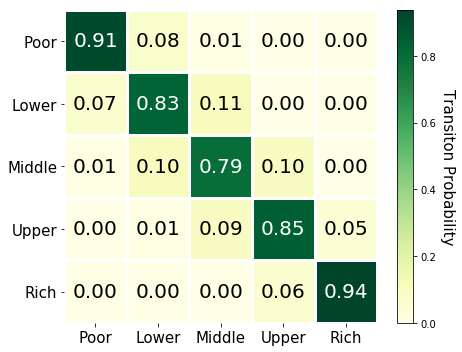

In [26]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# sphinx_gallery_thumbnail_number = 2

# vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
#               "potato", "wheat", "barley"]
# farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
#            "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

incomes = np.array(["Poor","Lower","Middle","Upper","Rich"])

fig, ax = plt.subplots(figsize = (6.5,5))
im, cbar = heatmap(p_single, incomes, incomes, ax=ax,
                   cmap="YlGn", cbarlabel="Transiton Probability")
texts = annotate_heatmap(im, valfmt="{x:.2f}",fontsize=20)

fig.tight_layout()
plt.show()
fig.savefig("Transition_all.png",dpi=200)

In [116]:
2%4

2

In [119]:
int(3/4)

0

/Users/weikang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:106: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


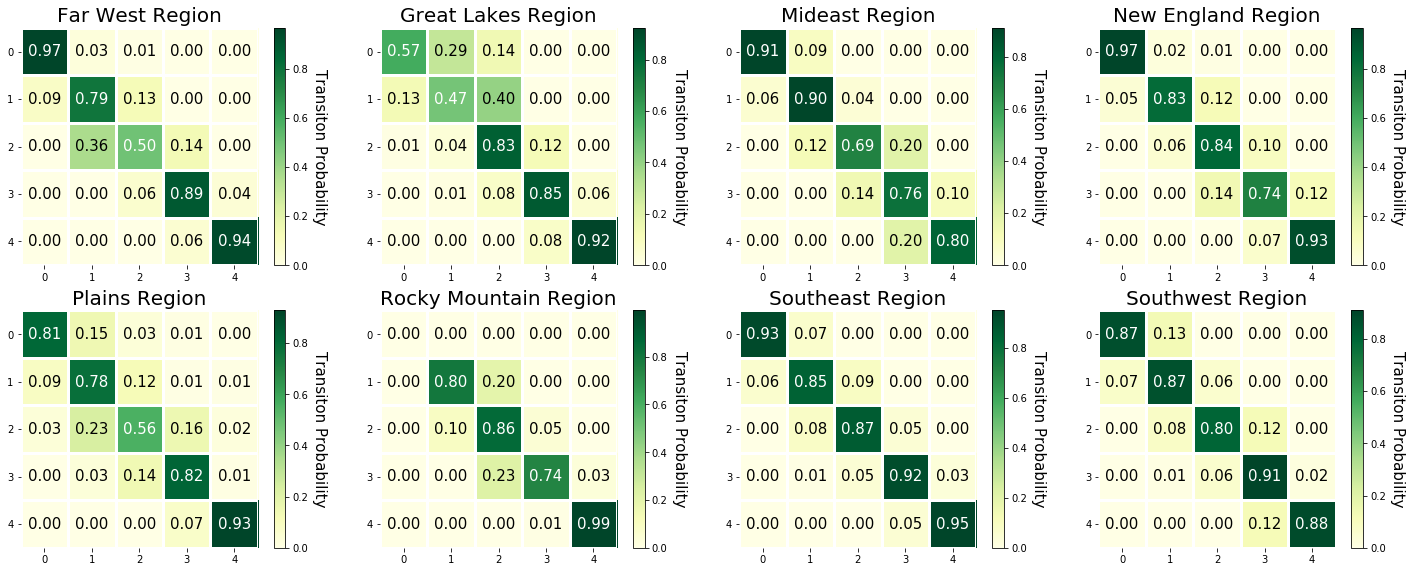

In [148]:
fig, axes = plt.subplots(2,4,figsize = (20,8))
num = 0
for region,p in dict_ps.items():
    i = int(num/4)
    j = num%4
    ax = axes[i,j]
    im, cbar = heatmap(p, np.arange(len(p)), np.arange(len(p)), ax=ax,
                       cmap="YlGn", cbarlabel="Transiton Probability")
    texts = annotate_heatmap(im, valfmt="{x:.2f}",fontsize=15)
    ax.set_title(region,fontsize=20)
    num = num+1

fig.tight_layout()
plt.show()
fig.savefig("Transition_all.png",dpi=150)

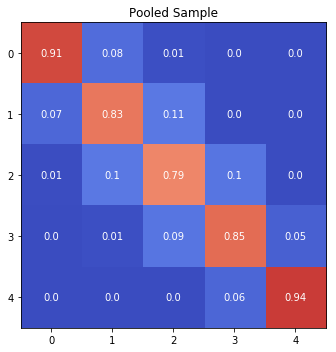

In [110]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# sphinx_gallery_thumbnail_number = 2

# vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
#               "potato", "wheat", "barley"]
# farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
#            "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]



fig, ax = plt.subplots(figsize = (5,5))
im = ax.imshow(p_single,cmap = "coolwarm",vmin=0, vmax=1)

# We want to show all ticks...
ax.set_xticks(np.arange(len(p_single)))
ax.set_yticks(np.arange(len(p_single)))
# ... and label them with the respective list entries
ax.set_xticklabels(np.arange(len(p_single)))
ax.set_yticklabels(np.arange(len(p_single)))

# Rotate the tick labels and set their alignment.
# plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#          rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(p_single)):
    for j in range(len(p_single)):
        text = ax.text(j, i, round(p_single[i, j], 2),
                       ha="center", va="center", color="w")

ax.set_title("Pooled Sample")
fig.tight_layout()
plt.show()
fig.subplots_adjust(right=0.92)
cbar_ax = fig.add_axes([0.95, 0.228, 0.01, 0.5])
fig.colorbar(im, cax=cbar_ax)

In [67]:
rpci.T

(81, 48)

In [18]:
complete_table.groupby(["BEA region"]).groups.keys()

dict_keys(['Far West Region', 'Great Lakes Region', 'Mideast Region', 'New England Region', 'Plains Region', 'Rocky Mountain Region', 'Southeast Region', 'Southwest Region'])

In [21]:
complete_table.groupby(["BEA region"]).groups['Far West Region']

Int64Index([0, 10, 21, 23], dtype='int64')

In [32]:
index_year = list(map(str,range(1929,2010)))

In [48]:
complete_table.iloc[[0, 10, 21, 23]][index_year]

,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,741,658,534,402,376,443,490,569,599,582,...,31528,32053,32206,32934,34984,35738,38477,40782,41588,40619
10,668,607,505,379,358,439,458,548,556,531,...,28350,28866,29387,30172,31217,32108,34212,35279,35899,35210
21,868,833,652,550,495,546,658,843,762,780,...,30529,30718,30849,32182,34757,37555,38652,40326,40332,38009
23,991,887,749,580,546,603,660,771,795,771,...,32275,32750,32900,33801,35663,37463,40169,41943,42377,40902


In [38]:
farwest = complete_table.iloc[[0, 10, 21, 23]][index_year].values.T
farwest[:, 0]

array([  741,   658,   534,   402,   376,   443,   490,   569,   599,
         582,   614,   658,   864,  1196,  1469,  1527,  1419,  1401,
        1504,  1624,  1595,  1721,  1874,  1973,  2066,  2077,  2116,
        2172,  2262,  2281,  2380,  2436,  2535,  2680,  2735,  2858,
        3078,  3385,  3566,  3850,  4097,  4205,  4381,  4731,  5312,
        5919,  6533,  7181,  7832,  8887,  9965, 10913, 11903, 12431,
       13124, 14021, 14738, 15522, 16300, 17270, 18670, 20026, 20901,
       21917, 22414, 23119, 23878, 25287, 26817, 28632, 30392, 31528,
       32053, 32206, 32934, 34984, 35738, 38477, 40782, 41588, 40619])

In [ ]:
import mapclassify as mc

q5 = np.array([mc.Quantiles(y,k=5).yb for y in farwest]).transpose()
print(q5[:, 0])

In [39]:
import mapclassify as mc
q5 = np.array([mc.Quantiles(y,k=5).yb for y in farwest]).transpose()
print(q5[:, 0])

[1 0 3 4]


/Users/weikang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


The BEA regions are visualized below:

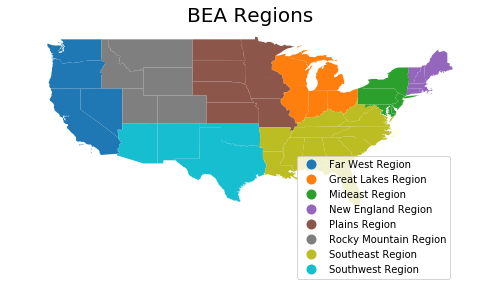

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize = (8,8))
beaplot = complete_table.plot(ax=ax,column="BEA region", legend=True)
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.8, 0.15, 0.16, 0.2))
beaplot.set_title("BEA Regions",fontdict={"fontsize":20})
ax.set_axis_off()

In [12]:
import libpysal
f = libpysal.io.open(libpysal.examples.get_path("usjoin.csv"))
pci = np.array([f.by_col[str(y)] for y in range(1929,2010)])
rpci= (pci.T / pci.mean(axis=1)).T

In [13]:
sm = giddy.markov.Spatial_Markov(rpci.T, w, fixed = True, k = 5,m=5) # spatial_markov instance o 

NameError: name 'w' is not defined

## Kendall's $\tau$

Kendall’s $\tau$ statistic is based on a comparison of the number of pairs of $n$ observations that have concordant ranks between two variables. For measuring exchange mobility in **giddy**, the two variables in question are the values of an attribute measured at two points in time over $n$ spatial units. This classic measure of rank correlation indicates how much relative stability there has been in the map pattern over the two periods. Spatial decomposition of Kendall’s $\tau$ could be classified into three spatial scales: global spatial decomposition , inter- and intra-regional decomposition and local spatial decomposition. More details will be given latter.

### Classic Kendall's $\tau$

Kendall's $\tau$ statistic is a global measure of exchange mobility. For $n$ spatial units over two periods, it is formally defined as follows:

$$\tau = \frac{c-d}{(n(n-1))/2}$$

where $c$ is the number of concordant pairs (two spatial units which do not exchange ranks over two periods), and $d$ is the number of discordant pairs (two spatial units which exchange ranks over two periods). $-1 \leq \tau \leq 1$. Smaller $\tau$ indicates higher exchange mobility.

In giddy, class $Tau$ requires two inputs: a cross-section of income values at one period ($x$) and a cross-section of income values at another period ($y$):

```python
giddy.rank.Tau(self, x, y)
```

We will construct a $Tau$ instance by specifying the incomes in two periods. Here, we look at the global exchange mobility of US states between 1929 and 2009.

In [10]:
import giddy

In [8]:
tau = giddy.rank.Tau(complete_table["1929"],complete_table["2009"])
tau

In [9]:
tau.concordant

856.0

In [10]:
tau.discordant

271.0

There are 856 concordant pairs of US states between 1929 and 2009, and 271 discordant pairs.

In [11]:
tau.tau

0.5188470576690462

In [12]:
tau.tau_p

1.9735720263920198e-07

The observed Kendall's $\tau$ statistic is 0.519 and its p-value is $1.974 \times 10^{-7}$. Therefore, we will reject the null hypothesis of no assocation between 1929 and 2009 at the $5\%$ significance level.

### Spatial Kendall's $\tau$

The spatial Kendall's $\tau$ decomposes all pairs into those that are spatial neighbors and those that are not, and examines whether the rank correlation is different between the two sets (Rey, 2014). 

$$\tau_w = \frac{\iota'(W\circ S)\iota}{\iota'W \iota}$$

$W$ is the spatial weight matrix, $S$ is the concordance matrix and $\iota$ is the $(n,1)$ unity vector. The null hypothesis is the spatial randomness of rank exchanges. The inference of $\tau_w$ could be conducted based on random spatial permutation of incomes at two periods. 

```python
giddy.rank.SpatialTau(self, x, y, w, permutations=0)
```
For illustration, we turn back to the case of incomes in US states over 1929-2009:

In [13]:
from libpysal.weights import block_weights
w = block_weights(complete_table["BEA region"])
np.random.seed(12345)
tau_w = giddy.rank.SpatialTau(complete_table["1929"],complete_table["2009"],w,999) 

/Users/weikang/Google Drive (weikang@ucr.edu)/python_repos/pysal-refactor/libpysal/libpysal/weights/weights.py:171: UserWarning: The weights matrix is not fully connected. There are 8 components
  warnings.warn("The weights matrix is not fully connected. There are %d components" % self.n_components)


In [14]:
tau_w.concordant

856.0

In [15]:
tau_w.concordant_spatial

103

In [16]:
tau_w.discordant

271.0

In [17]:
tau_w.discordant_spatial

41

Out of 856 concordant pairs of spatial units, 103 belong to the same region (and are considered neighbors); out of 271 discordant pairs of spatial units, 41 belong to the same region.

In [18]:
tau_w.tau_spatial

0.4305555555555556

In [19]:
tau_w.tau_spatial_psim

0.001

The estimate of spatial Kendall's $\tau$ is 0.431 and its p-value is 0.001 which is much smaller than the significance level $0.05$. Therefore, we reject the null of spatial randomness of exchange mobility. The fact that $\tau_w=0.431$  is smaller than the global average $\tau=0.519$ implies that globally a significant number of rank exchanges happened between states within the same region though we do not know the specific region or regions hosting these rank exchanges. A more thorough decomposition of $\tau$ such as inter- and intra-regional indicators and local indicators will provide insights on this issue.

### Inter- and Intra-regional decomposition of Kendall's $\tau$

A meso-level view on the exchange mobility pattern is provided by inter- and intra-regional decomposition of Kendall's $\tau$. This decomposition can shed light on specific regions hosting most rank exchanges. More precisely, insteading of examining the concordance relationship between any two neighboring spatial units in the whole study area, for a specific region A, we examine the concordance relationship between any two spatial units within region A (neighbors), resulting in the intraregional concordance statistic for A; or we could examine the concordance relationship between any spatial unit in region A and any spatial unit in region B (nonneighbors), resulting in the interregional concordance statistic for A and B. If there are k regions, there will be k intraregional concordance statistics and $(k-1)^2$ interregional concordance statistics, we could organize them into a $(k,k)$ matrix where the diagonal elements are intraregional concordance statistics and nondiagnoal elements are interregional concordance statistics.

Formally, this inter- and intra-regional concordance statistic matrix is defined as follows (Rey, 2016):

$$T=\frac{P(H \circ S)P'}{P H P'}$$

$P$ is a $(k,n)$ binary matrix where $p_{j,i}=1$ if spatial unit $i$ is in region $j$ and $p_{j,i}=0$ otherwise. $H$ is a $(n,n)$ matrix with 0 on diagnoal and 1 on other places. $\circ$ is the Hadamard product. Inference could be based on random spatial permutation of incomes at two periods, similar to spatial $\tau$. 

To obtain an estimate for the inter- and intra-regional indicator matrix, we use the $Tau\_Regional$ class:
```python
giddy.rank.Tau_Regional(self, x, y, regime, permutations=0)
```
Here, $regime$ is an 1-dimensional array of size n. Each element is the id of which region an spatial unit belongs to.

In [20]:
giddy.rank.Tau_Regional?

Similar to before, we go back to the case of incomes in US states over 1929-2009:

In [21]:
np.random.seed(12345)
tau_w = giddy.rank.Tau_Regional(complete_table["1929"],complete_table["2009"],complete_table["BEA region"],999) 
tau_w

/Users/weikang/Google Drive (weikang@ucr.edu)/python_repos/pysal-refactor/libpysal/libpysal/weights/weights.py:171: UserWarning: The weights matrix is not fully connected. There are 8 components
  warnings.warn("The weights matrix is not fully connected. There are %d components" % self.n_components)


In [22]:
tau_w.tau_reg

array([[ 0.66666667,  0.5       ,  0.3       ,  0.41666667,  0.28571429,
         0.5       ,  0.79166667,  0.875     ],
       [ 0.5       ,  0.4       ,  0.52      ,  0.26666667, -0.48571429,
         0.52      ,  0.53333333,  0.6       ],
       [ 0.3       ,  0.52      ,  0.        ,  0.4       ,  0.88571429,
         0.76      ,  0.93333333,  1.        ],
       [ 0.41666667,  0.26666667,  0.4       ,  0.86666667,  0.47619048,
         0.83333333,  0.86111111,  0.91666667],
       [ 0.28571429, -0.48571429,  0.88571429,  0.47619048, -0.14285714,
         0.42857143,  0.69047619,  0.14285714],
       [ 0.5       ,  0.52      ,  0.76      ,  0.83333333,  0.42857143,
         0.8       ,  0.06666667,  0.1       ],
       [ 0.79166667,  0.53333333,  0.93333333,  0.86111111,  0.69047619,
         0.06666667,  0.54545455,  0.33333333],
       [ 0.875     ,  0.6       ,  1.        ,  0.91666667,  0.14285714,
         0.1       ,  0.33333333,  0.        ]])

The attribute $tau\_reg$ gives the inter- and intra-regional concordance statistic matrix. Higher values represents lower exchange mobility. Obviously there are some negative values indicating high exchange mobility. Attribute $tau\_reg\_pvalues$ gives pvalues for all inter- and intra-regional concordance statistics: 

In [23]:
tau_w.tau_reg_pvalues

array([[0.586, 0.516, 0.196, 0.37 , 0.151, 0.526, 0.051, 0.104],
       [0.516, 0.41 , 0.583, 0.114, 0.001, 0.532, 0.526, 0.472],
       [0.196, 0.583, 0.102, 0.316, 0.011, 0.156, 0.001, 0.014],
       [0.37 , 0.114, 0.316, 0.122, 0.41 , 0.034, 0.003, 0.026],
       [0.151, 0.001, 0.011, 0.41 , 0.013, 0.344, 0.08 , 0.051],
       [0.526, 0.532, 0.156, 0.034, 0.344, 0.324, 0.005, 0.056],
       [0.051, 0.526, 0.001, 0.003, 0.08 , 0.005, 0.502, 0.136],
       [0.104, 0.472, 0.014, 0.026, 0.051, 0.056, 0.136, 0.166]])

We can manipulate these two attribute to obtain significant inter- and intra-regional statistics only (at the $5\%$ significance level):

In [24]:
tau_w.tau_reg * (tau_w.tau_reg_pvalues<0.05)

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.48571429,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.88571429,
         0.        ,  0.93333333,  1.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.83333333,  0.86111111,  0.91666667],
       [ 0.        , -0.48571429,  0.88571429,  0.        , -0.14285714,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.83333333,  0.        ,
         0.        ,  0.06666667,  0.        ],
       [ 0.        ,  0.        ,  0.93333333,  0.86111111,  0.        ,
         0.06666667,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.91666667,  0.        ,
         0.        ,  0.        ,  0.        ]])

The table below displays the inter- and intra-regional decomposition matrix of Kendall's $\tau$ for US states over 1929-2009 based on the 8 BEA regions. Bold numbers indicate significance at the $5\%$ significance level. The negative and significant intra-Southeast concordance statistic ($-0.486$) indicates that the rank exchanges within Southeast region is significantly more frequent than those between states within and out of Southeast region.

| Region        | New England| Mideast|Great Lakes|Plains|Southeast|Southwest|Rocky Mountain|Far West|
|:-------------:|:-------------:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
| New England  | 0.667|  0.5 | 0.3|0.417|  0.2856|0.5 | 0.792|  0.875|
| Mideast      | 0.5 |  0.4|0.52|0.267| **-0.486**|0.52| 0.533| 0.6 |
| Great Lakes |  0.3 |  0.52 |  0  |  0.4 |  **0.886**| 0.76 | **0.933**|1.|
|Plains| 0.417| 0.267|  0.4 |  0.867|  0.476|**0.833**| **0.861**| **0.917**|
|Southeast|0.286|**-0.486**|**0.886**| 0.476| **-0.143**|0.429| 0.690| 0.143|
|Southwest| 0.5 |0.52 |0.76|**0.833**| 0.429|0.8|**0.067**|0.1|
|Rocky Mountain|0.792| 0.533| **0.933**|**0.861**| 0.69|**0.067**| 0.545|0.333|
|Far West|0.875|0.6| 1.| **0.917**|0.143|0.1 |0.333| 0|

### Local Kendall's $\tau$

Local Kendall's $\tau$ is a local decomposition of classic Kendall's $\tau$ which provides an indication of the contribution of spatial unit $r$’s rank changes to the overall level of exchange mobility (Rey, 2016). Focusing on spatial unit $r$, we formally define it as follows:
$$\tau_{r} = \frac{c_r - d_r}{n-1}$$

where $c_r$ is the number of spatial units (except $r$) which are concordant with $r$ and $d_r$ is the number of spatial units which are discordant with $r$. Similar to classic Kendall's $\tau$, local $\tau$ takes values on $[-1,1]$. The larger the value, the lower the exchange mobility for $r$.

```python
giddy.rank.Tau_Local(self, x, y)
```

We create a $Tau\_Local$ instance for US dynamics 1929-2009:

In [25]:
tau_r = giddy.rank.Tau_Local(complete_table["1929"],complete_table["2009"])
tau_r

In [26]:
pd.DataFrame({"STATE_NAME":complete_table['STATE_NAME'].tolist(),"$\\tau_r$":tau_r.tau_local}).head()

,STATE_NAME,$\tau_r$
0,Washington,0.617021
1,Montana,0.446809
2,Maine,0.404255
3,North Dakota,-0.021277
4,South Dakota,0.319149


Therefore, local concordance measure produces a negative value for North Dakota (-0.0213) indicating that North Dakota exchanged ranks with a lot of states across 1929-2000. On the contrary, the local $\tau$ statistic is quite high for Washington (0.617) highlighting a high stability of Washington.

### Local indicator of mobility association-LIMA

To reveal the role of space in shaping the exchange mobility pattern for each spatial unit, two spatial variants of local Kendall's $\tau$ could be utilized: neighbor set LIMA and neighborhood set LIMA (Rey, 2016). The latter is also the result of a decomposition of local Kendall's $\tau$ (into neighboring and nonneighboring parts) as well as a decompostion of spatial Kendall's $\tau$ (into its local components).

#### Neighbor set LIMA

Instead of examining the concordance relationship between a focal spatial unit $r$ and all the other units as what local $\tau$ does, neighbor set LIMA focuses on the concordance relationship between a focal spatial unit $r$ and its neighbors only. It is formally defined as follows:

$$\tilde{\tau}_{r} = \frac{\sum_b w_{r,b} s_{r,b}}{\sum_b w_{r,b}}$$

```python
giddy.rank.Tau_Local_Neighbor(self, x, y, w, permutations=0)
```

In [27]:
tau_wr = giddy.rank.Tau_Local_Neighbor(complete_table["1929"],complete_table["2009"],w,999) 
tau_wr

In [28]:
tau_wr.tau_ln

array([ 0.33333333,  1.        ,  1.        , -0.66666667,  0.        ,
        1.        ,  0.        ,  0.5       ,  1.        ,  0.66666667,
        1.        ,  0.6       , -0.33333333,  1.        ,  0.33333333,
        0.        ,  0.5       ,  1.        ,  0.6       ,  0.        ,
        1.        ,  0.33333333,  0.5       ,  1.        ,  0.        ,
        1.        ,  0.        , -0.09090909, -0.5       ,  1.        ,
        0.09090909,  0.        ,  0.63636364, -1.        , -1.        ,
        0.33333333,  0.27272727,  0.45454545,  0.33333333,  0.33333333,
        0.63636364,  0.81818182,  0.45454545,  0.81818182,  0.81818182,
        0.81818182,  0.81818182,  0.        ])

To visualize the spatial distribution of neighbor set LIMA:

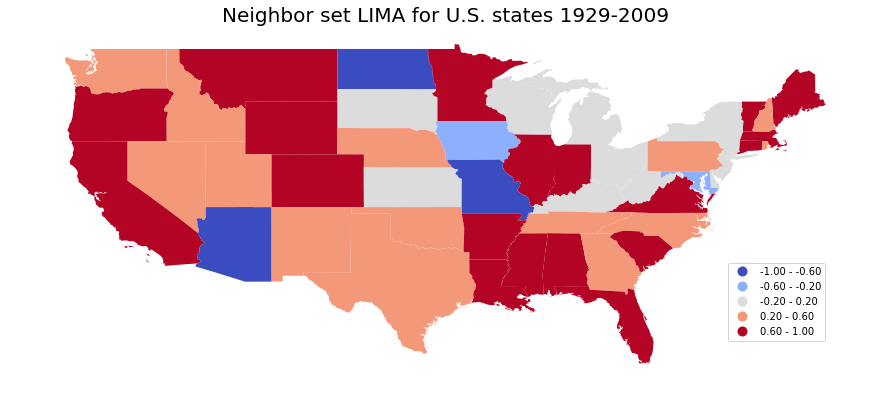

In [29]:
complete_table["tau_ln"] =tau_wr.tau_ln
fig, ax = plt.subplots(nrows=1, ncols=1,figsize = (15,8))
ln_map = complete_table.plot(ax=ax, column="tau_ln", cmap='coolwarm', scheme='equal_interval',legend=True)
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.8, 0.15, 0.16, 0.2))
ln_map.set_title("Neighbor set LIMA for U.S. states 1929-2009",fontdict={"fontsize":20})
ax.set_axis_off()

Therefore, Arizona, North Dakota, and Missouri exchanged ranks with most of their neighbors over 1929-2009 while California, Virginia etc. barely exchanged ranks with their neighbors.

Let see whether neighbor set LIMA statistics are siginificant for these "extreme" states:

In [30]:
tau_wr.tau_ln_pvalues

array([0.463, 0.256, 0.165, 0.101, 0.316, 0.336, 0.237, 0.614, 0.292,
       0.325, 0.33 , 0.675, 0.06 , 0.541, 0.412, 0.032, 0.594, 0.791,
       0.575, 0.049, 0.209, 0.48 , 0.488, 0.457, 0.605, 0.409, 0.259,
       0.018, 0.022, 0.405, 0.016, 0.25 , 0.001, 0.001, 0.045, 0.521,
       0.167, 0.363, 0.635, 0.478, 0.417, 0.247, 0.282, 0.423, 0.578,
       0.17 , 0.1  , 0.625])

In [31]:
sig_wr = tau_wr.tau_ln * (tau_wr.tau_ln_pvalues<0.05)
sig_wr

array([ 0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.09090909, -0.5       ,  0.        ,
        0.09090909,  0.        ,  0.63636364, -1.        , -1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ])

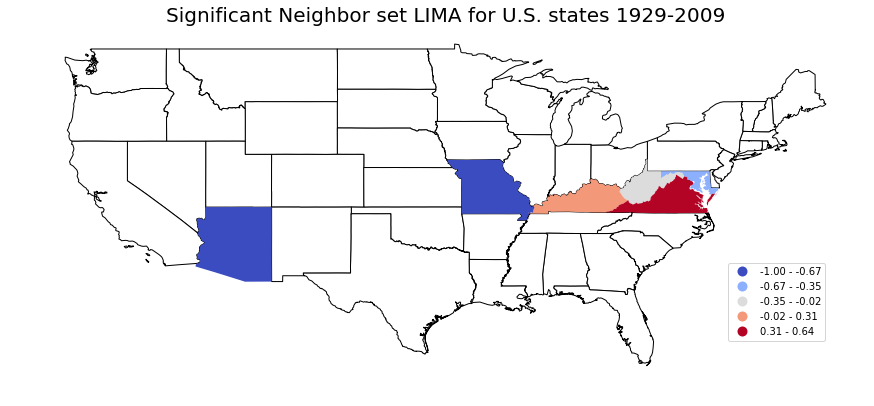

In [32]:
complete_table["sig_wr"] =sig_wr
fig, ax = plt.subplots(nrows=1, ncols=1,figsize = (15,8))
complete_table[complete_table["sig_wr"] == 0].plot(ax=ax, color='white',edgecolor='black')
sig_ln_map = complete_table[complete_table["sig_wr"] != 0].plot(ax=ax,column="sig_wr",cmap='coolwarm',scheme='equal_interval',legend=True)
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.8, 0.15, 0.16, 0.2))
sig_ln_map.set_title("Significant Neighbor set LIMA for U.S. states 1929-2009",fontdict={"fontsize":20})
ax.set_axis_off()

Thus, Arizona and Missouri have significant and negative neighbor set LIMA values, and can be considered as hotspots of rank exchanges. This means that Arizona (or Missouri) tended to exchange ranks with its neighbors than with others over 1929-2009. On the contrary, Virgina has significant and large positive neighbor set LIMA value indicating that it tended to exchange ranks with its nonneighbors than with neighbors.

#### Neighborhood set LIMA

Neighborhood set LIMA extends neighbor set LIMA $\tilde{\tau}_{r}$ to consider the concordance relationships between any two spatial units in the subset which is composed of the focal unit $r$ and its neighbors.

```python
giddy.rank.Tau_Local_Neighborhood(self, x, y, w, permutations=0)
```

In [33]:
tau_wwr = giddy.rank.Tau_Local_Neighborhood(complete_table["1929"],complete_table["2009"],w,999) 
tau_wwr

In [34]:
tau_wwr.tau_lnhood

array([ 0.66666667,  0.8       ,  0.86666667, -0.14285714, -0.14285714,
        0.8       ,  0.4       ,  0.8       ,  0.86666667, -0.14285714,
        0.66666667,  0.86666667, -0.14285714,  0.86666667, -0.14285714,
        0.        ,  0.        ,  0.86666667,  0.86666667,  0.        ,
        0.4       ,  0.66666667,  0.8       ,  0.66666667,  0.4       ,
        0.4       ,  0.        ,  0.54545455,  0.        ,  0.8       ,
        0.54545455, -0.14285714,  0.54545455, -0.14285714,  0.        ,
        0.        ,  0.54545455,  0.54545455,  0.        ,  0.        ,
        0.54545455,  0.54545455,  0.54545455,  0.54545455,  0.54545455,
        0.54545455,  0.54545455,  0.4       ])

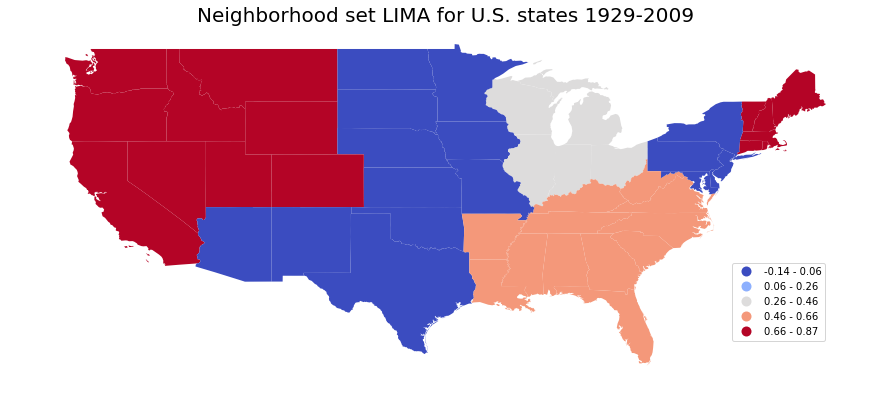

In [35]:
complete_table["tau_lnhood"] =tau_wwr.tau_lnhood
fig, ax = plt.subplots(nrows=1, ncols=1,figsize = (15,8))
ln_map = complete_table.plot(ax=ax, column="tau_lnhood", cmap='coolwarm', scheme='equal_interval',legend=True)
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.8, 0.15, 0.16, 0.2))
ln_map.set_title("Neighborhood set LIMA for U.S. states 1929-2009",fontdict={"fontsize":20})
ax.set_axis_off()

In [36]:
tau_wwr.tau_lnhood_pvalues

array([0.585, 0.278, 0.104, 0.032, 0.024, 0.295, 0.43 , 0.225, 0.167,
       0.02 , 0.548, 0.116, 0.023, 0.158, 0.017, 0.016, 0.075, 0.225,
       0.168, 0.027, 0.505, 0.66 , 0.146, 0.605, 0.614, 0.37 , 0.08 ,
       0.505, 0.059, 0.358, 0.541, 0.025, 0.185, 0.017, 0.225, 0.151,
       0.541, 0.527, 0.191, 0.12 , 0.519, 0.427, 0.526, 0.442, 0.453,
       0.528, 0.478, 0.617])

In [37]:
sig_lnhood = tau_wwr.tau_lnhood * (tau_wwr.tau_lnhood_pvalues<0.05)
sig_lnhood

array([ 0.        ,  0.        ,  0.        , -0.14285714, -0.14285714,
        0.        ,  0.        ,  0.        ,  0.        , -0.14285714,
        0.        ,  0.        , -0.14285714,  0.        , -0.14285714,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.14285714,  0.        , -0.14285714,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ])

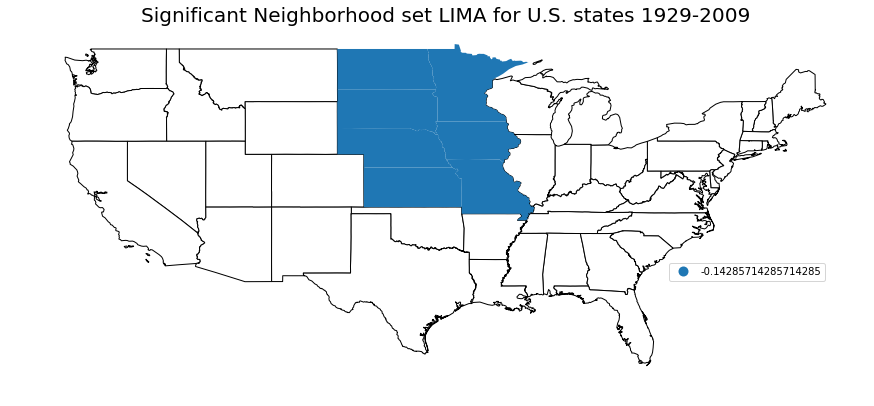

In [38]:
complete_table["sig_lnhood"] =sig_lnhood
fig, ax = plt.subplots(nrows=1, ncols=1,figsize = (15,8))
complete_table[complete_table["sig_lnhood"] == 0].plot(ax=ax, color='white',edgecolor='black')
sig_ln_map = complete_table[complete_table["sig_lnhood"] != 0].plot(ax=ax,column="sig_lnhood",categorical=True,legend=True)
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.8, 0.15, 0.16, 0.2))
sig_ln_map.set_title("Significant Neighborhood set LIMA for U.S. states 1929-2009",fontdict={"fontsize":20})
ax.set_axis_off()

## $\Theta$ statistic of exchange mobility

## Next steps

* theta statistic

## References
* Rey, Sergio J., and Myrna L. Sastré-Gutiérrez. 2010. “[Interregional Inequality Dynamics in Mexico](http://www.tandfonline.com/doi/abs/10.1080/17421772.2010.493955).” Spatial Economic Analysis 5 (3). Taylor & Francis: 277–98.
* Rey, Sergio J. 2014. “[Fast Algorithms for a Space-Time Concordance Measure](https://link.springer.com/article/10.1007/s00180-013-0461-2).” Computational Statistics 29 (3-4). Springer: 799–811.
* Rey, Sergio J. 2016. “[Space--Time Patterns of Rank Concordance: Local Indicators of Mobility Association with Application to Spatial Income Inequality Dynamics](http://www.tandfonline.com/doi/abs/10.1080/24694452.2016.1151336?journalCode=raag21).” Annals of the Association of American Geographers. Association of American Geographers 106 (4): 788–803.